# COURSE: A deep understanding of deep learning
## SECTION: FFNs
### LECTURE: FFN to classify digits
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [2]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Import and process the data

In [3]:
import torchvision
MNIST = torchvision.datasets.MNIST(".", download=True)
data = MNIST.train_data
labels = MNIST.train_labels

data = data.view(data.shape[0], -1).numpy()
labels = labels.numpy()

c:\Users\pmiha\anaconda3\envs\MLFlow_env\lib\site-packages\torchvision\datasets\mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
c:\Users\pmiha\anaconda3\envs\MLFlow_env\lib\site-packages\torchvision\datasets\mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [4]:
indices = np.random.choice(data.shape[0], 20000, replace=False)
data = data[indices]
labels = labels[indices]

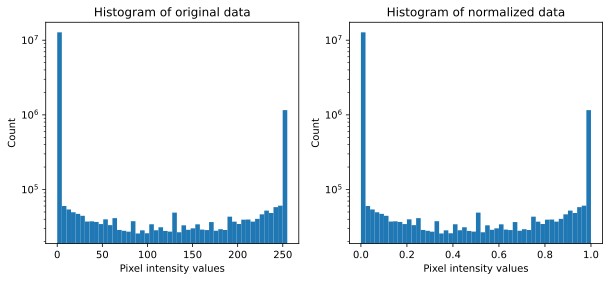

In [5]:
# normalize the data to a range of [0 1]
dataNorm = data / np.max(data)

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].hist(data.flatten(),50)
ax[0].set_xlabel('Pixel intensity values')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of original data')
ax[0].set_yscale('log')


ax[1].hist(dataNorm.flatten(),50)
ax[1].set_xlabel('Pixel intensity values')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of normalized data')
ax[1].set_yscale('log')

plt.show()

# Create train/test groups using DataLoader

In [6]:
sevens_idx = labels == 7 

In [57]:
train_data = torch.tensor(dataNorm[~sevens_idx]).float()
test_data = torch.tensor(dataNorm[sevens_idx]).float()

train_labels = torch.tensor(labels[~sevens_idx]).long()
test_labels = torch.tensor(labels[sevens_idx]).long()

In [58]:
# # Step 1: convert to tensor
# dataT   = torch.tensor( dataNorm ).float()
# labelsT = torch.tensor( labels ).long() # long = int64

# # Step 2: use scikitlearn to split the data
# train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, test_size=.1)


# Step 3: convert into PyTorch Datasets
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

# Step 4: translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

# Create the DL model

In [52]:
# create a class for the model with dropout regularization
def createTheMNISTNet():

    class mnistNet(nn.Module):
        def __init__(self):
            super().__init__()

            ### input layer
            self.input = nn.Linear(784,64)
            
            ### hidden layer
            self.fc1 = nn.Linear(64,32)
            self.fc2 = nn.Linear(32,32)
            
            ### dropout layers
            self.dropout = nn.Dropout(0.2)

            ### output layer
            self.output = nn.Linear(32,10)

        # forward pass
        def forward(self,x):
            x = F.relu( self.input(x) )
            x = self.dropout(F.relu( self.fc1(x) ))
            x = self.dropout(F.relu( self.fc2(x) ))
            return torch.log_softmax( self.output(x),axis=1 )
            # NEW HERE: log-softmax the output, because I'm using NLLLoss instead of CrossEntropyLoss
    
    # create the model instance
    net = mnistNet()
    
    # loss function
    lossfun = nn.NLLLoss()

    # optimizer
    optimizer = torch.optim.SGD(net.parameters(),lr=.01)

    return net,lossfun,optimizer

In [9]:
# create a class for the model
def createTheMNISTNet():

  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,64)
      
      ### hidden layer
      self.fc1 = nn.Linear(64,32)
      self.fc2 = nn.Linear(32,32)

      ### output layer
      self.output = nn.Linear(32,10)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return torch.log_softmax( self.output(x),axis=1 )
      # NEW HERE: log-softmax the output, because I'm using NLLLoss instead of CrossEntropyLoss
  
  # create the model instance
  net = mnistNet()
  
  # loss function
  lossfun = nn.NLLLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

In [59]:
# test the model with one batch
net,lossfun,optimizer = createTheMNISTNet()

X,y = next(iter(train_loader))
yHat = net(X)

# values are log-probability of each number (0-9)
print(torch.exp(yHat))

# now let's compute the loss
loss = lossfun(yHat,y)
print(' ')
print('Loss:')
print(loss)

tensor([[0.1160, 0.0934, 0.0948, 0.0889, 0.1063, 0.0768, 0.1224, 0.0957, 0.1118,
         0.0939],
        [0.1154, 0.0921, 0.0912, 0.0924, 0.1045, 0.0787, 0.1188, 0.0980, 0.1081,
         0.1009],
        [0.1172, 0.0992, 0.0871, 0.0940, 0.1033, 0.0772, 0.1193, 0.1027, 0.1069,
         0.0931],
        [0.1168, 0.0948, 0.0908, 0.0904, 0.0990, 0.0805, 0.1152, 0.0961, 0.1135,
         0.1029],
        [0.1205, 0.0912, 0.0884, 0.0952, 0.1018, 0.0788, 0.1222, 0.0987, 0.1071,
         0.0960],
        [0.1209, 0.0915, 0.0893, 0.0937, 0.0981, 0.0811, 0.1178, 0.0971, 0.1093,
         0.1012],
        [0.1166, 0.1007, 0.0925, 0.0903, 0.0986, 0.0794, 0.1151, 0.0983, 0.1081,
         0.1004],
        [0.1199, 0.0974, 0.0872, 0.0937, 0.0956, 0.0796, 0.1211, 0.0967, 0.1053,
         0.1036],
        [0.1212, 0.0951, 0.0903, 0.0944, 0.1021, 0.0771, 0.1209, 0.0921, 0.1085,
         0.0982],
        [0.1114, 0.0952, 0.0911, 0.0915, 0.1036, 0.0790, 0.1161, 0.1007, 0.1111,
         0.1003],
        [0

# Create a function that trains the model

In [54]:
# a function that trains the model

def function2trainTheModel():

  # number of epochs
  numepochs = 60
  
  # create a new model
  net,lossfun,optimizer = createTheMNISTNet()

  # initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    net.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad():
      yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )
    
    net.train()

  # end epochs

  # function output
  return trainAcc,testAcc,losses,net


# Run the model and show the results!

In [60]:
trainAcc,testAcc,losses,net = function2trainTheModel()


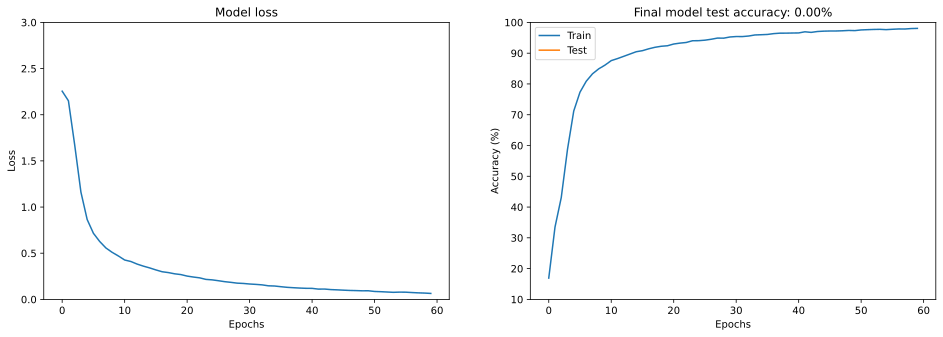

In [61]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

# Inspect the results in more detail

In [14]:
# run the model through for the test data
X,y = next(iter(test_loader))
predictions = net(X).detach()

print(torch.exp(predictions))

tensor([[9.0932e-05, 4.6484e-05, 6.6184e-01,  ..., 3.9406e-09, 9.6556e-04,
         2.5883e-01],
        [3.6224e-02, 7.3648e-08, 8.9673e-09,  ..., 1.4090e-08, 6.6424e-04,
         8.5563e-01],
        [1.2876e-09, 7.5977e-01, 1.4265e-02,  ..., 4.6322e-12, 2.1986e-01,
         2.8272e-04],
        ...,
        [1.7898e-06, 1.5393e-05, 8.9327e-04,  ..., 7.2722e-11, 7.9007e-02,
         8.3438e-01],
        [5.3753e-03, 3.6548e-10, 4.4201e-11,  ..., 2.3869e-10, 2.1529e-03,
         4.3412e-02],
        [6.5487e-06, 4.0543e-07, 2.8652e-01,  ..., 2.1272e-11, 6.1420e-05,
         1.9765e-01]])


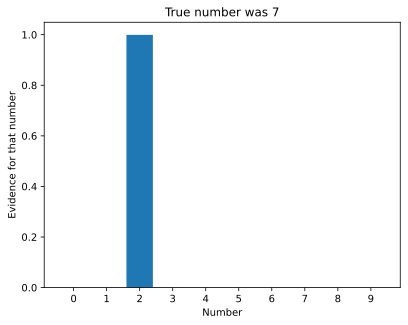

In [15]:
# Evidence for all numbers from one sample
sample2show = 125

plt.bar(range(10),torch.exp(predictions[sample2show])) # try adding exp!
plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.title('True number was %s' %y[sample2show].item())
plt.show()

[   0    1    2 ... 2120 2121 2122]


C:\Users\pmiha\AppData\Local\Temp\ipykernel_20032\2821726579.py:10: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[0].bar(range(10),np.exp(predictions[errors[sample2show]]))


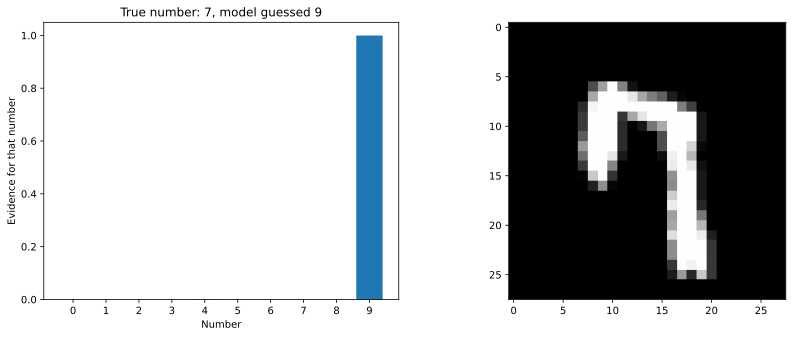

In [16]:
# find the errors
errors = np.where( torch.max(predictions,axis=1)[1] != y )[0]
print(errors)

# Evidence for all numbers from one sample
sample2show = 17

fig,ax = plt.subplots(1,2,figsize=(14,5))

ax[0].bar(range(10),np.exp(predictions[errors[sample2show]]))
ax[0].set_xticks(range(10))
ax[0].set_xlabel('Number')
ax[0].set_ylabel('Evidence for that number')
ax[0].set_title('True number: %s, model guessed %s' 
                %( y[errors[sample2show]].item(), torch.argmax(predictions[errors[sample2show]]).item() ))

ax[1].imshow( np.reshape(X[errors[sample2show],:],(28,28)) ,cmap='gray')

plt.show()

In [17]:
X = next(iter(test_loader))[0]

In [18]:
predictions = net(X).detach()

In [19]:
guesses = torch.argmax(predictions,axis=1).detach()

In [20]:
np.random.choice(len(X),12)

array([1426,  817,  828, 1982, 1624, 1359,  171,  888, 1235, 1868,  645,
       1333], dtype=int32)

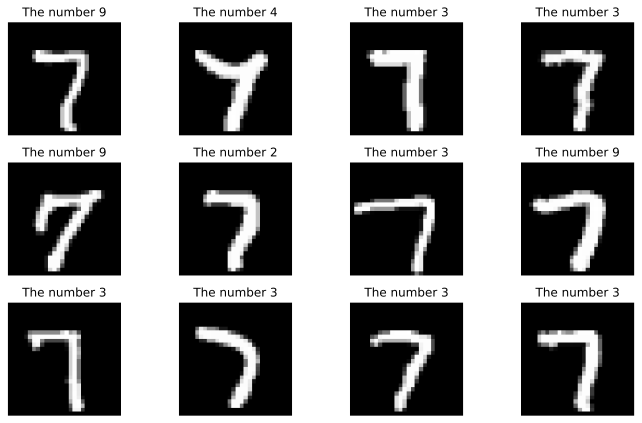

In [21]:
fig,axs = plt.subplots(3,4,figsize=(10,6))

someRandom7s = np.random.choice(len(X),12)

for i,ax in enumerate(axs.flatten()):

  thisimg = X[ someRandom7s[i] ].view(28,28)
  ax.imshow(thisimg,cmap='gray')
  ax.set_title(f'The number {guesses[ someRandom7s[i] ]}')
  ax.axis('off')

plt.tight_layout()
plt.show()

In [22]:
gueeses_np = guesses.numpy()

In [23]:
np.unique(guesses, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 8, 9]),
 array([  59,   45,  331,  478,   28,   57,    1,   20, 1104]))

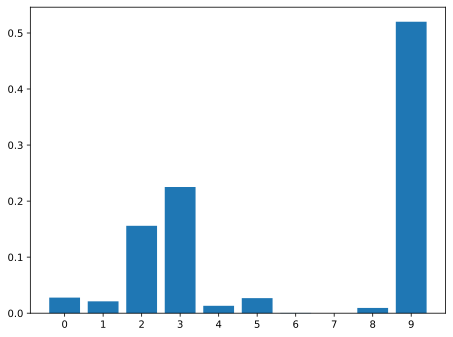

In [24]:
probMistaken = np.zeros(10)

for i in range(10):
    probMistaken[i] = torch.mean((guesses == i).float())
    
plt.bar(range(10),probMistaken)
plt.xticks(range(10))
plt.tight_layout()
plt.show()

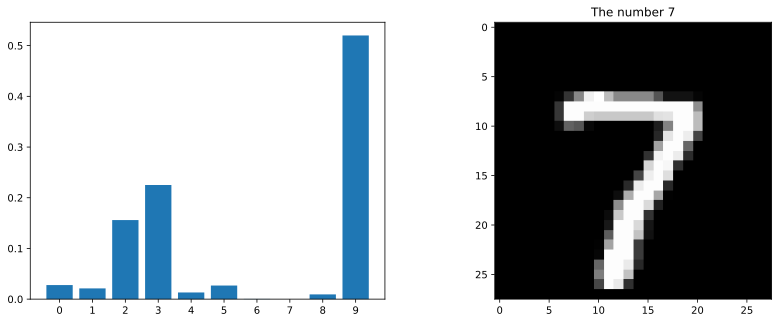

In [34]:
sample2show = 10

fig,ax = plt.subplots(1,2,figsize=(14,5))

ax[0].bar(range(10),probMistaken)
ax[0].set_xticks(range(10))

ax[1].imshow( np.reshape(X[[sample2show],:],(28,28)) ,cmap='gray')
ax[1].set_title('The number %s' %y[sample2show].item())

plt.show()

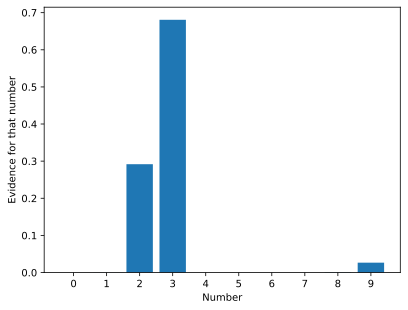

In [27]:
# Evidence for all numbers from one sample
sample2show = 10

plt.bar(range(10),torch.exp(predictions[sample2show]))
plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.show()

In [36]:
predictions

tensor([[ -9.3054,  -9.9764,  -0.4127,  ..., -19.3519,  -6.9428,  -1.3516],
        [ -3.3180, -16.4240, -18.5297,  ..., -18.0778,  -7.3169,  -0.1559],
        [-20.4705,  -0.2747,  -4.2500,  ..., -26.0980,  -1.5147,  -8.1711],
        ...,
        [-13.2334, -11.0816,  -7.0206,  ..., -23.3444,  -2.5382,  -0.1811],
        [ -5.2259, -21.7298, -23.8423,  ..., -22.1559,  -6.1409,  -3.1370],
        [-11.9362, -14.7183,  -1.2500,  ..., -24.5736,  -9.6978,  -1.6213]])

In [40]:
nulls = np.where( torch.max(predictions,axis=1)[1] == 0 )[0]

In [41]:
len(nulls)

59

In [42]:
nulls[1]

np.int64(87)

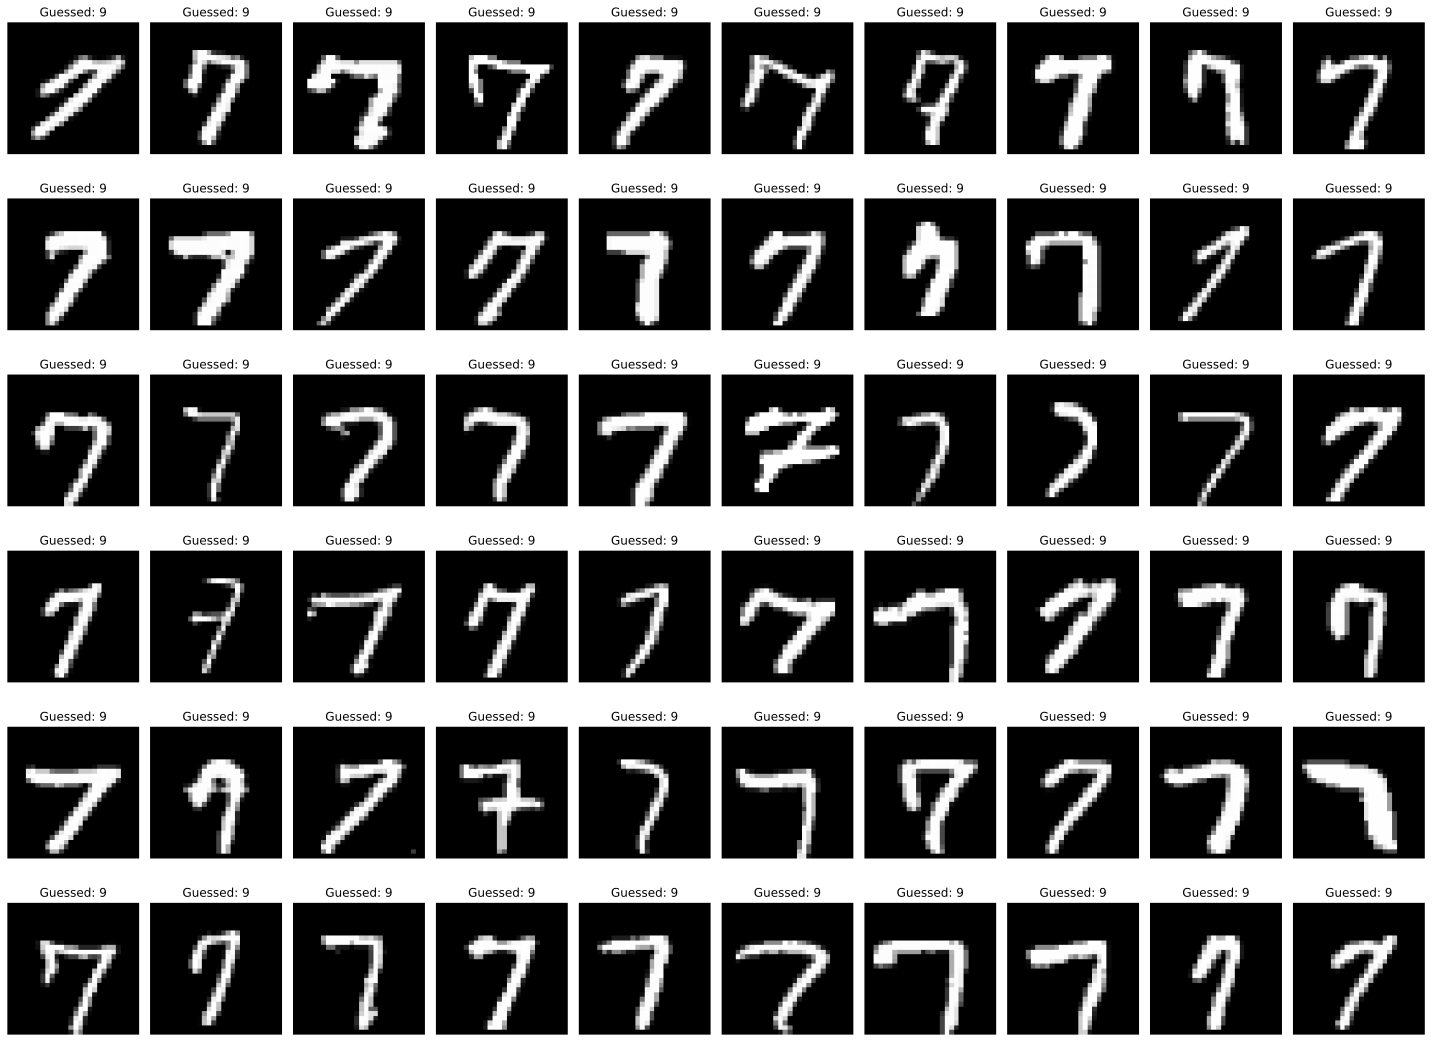

In [50]:
guessed_number = 9
numbers = np.where( torch.max(predictions,axis=1)[1] == guessed_number )[0]

fig,axs = plt.subplots(6,10,figsize=(20,15))

#someRandom7s = np.random.choice(len(X),12)

for i,ax in enumerate(axs.flatten()):

  if i < len(numbers):
    thisimg = X[ numbers[i] ].view(28,28)
    ax.imshow(thisimg,cmap='gray')
    ax.set_title(f'Guessed: {guessed_number}')
    ax.axis('off')

plt.tight_layout()
plt.show()